In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FOLDER_PATH = '/Users/artemzmailov/Desktop/Chemical_Industry_Project/'
data = pd.read_csv(FOLDER_PATH + 'total_data_for_analysis.csv', index_col = 0)

In [3]:
# Индексы взяты от раздела "Производство химических веществ и химических продуктов" с Росстата 
monthly_indexes = {
    # 2024-2025 (октябрь 2024 → октябрь 2025)
    '2025-01': 103.01, '2025-02': 101.60, '2025-03': 102.41, '2025-04': 99.23,
    '2025-05': 97.14, '2025-06': 95.80, '2025-07': 101.33, '2025-08': 96.05,
    '2025-09': 101.42, '2025-10': 101.04,
    
    # 2023-2024 
    '2024-01': 98.64, '2024-02': 98.61, '2024-03': 102.22, '2024-04': 101.75,
    '2024-05': 101.00, '2024-06': 99.54, '2024-07': 99.94, '2024-08': 100.65,
    '2024-09': 101.13, '2024-10': 100.62, '2024-11': 100.18, '2024-12': 100.76,
    
    # 2022-2023
    '2023-01': 100.56, '2023-02': 100.48, '2023-03': 99.73, '2023-04': 100.94,
    '2023-05': 101.78, '2023-06': 97.88, '2023-07': 100.09, '2023-08': 102.32,
    '2023-09': 103.45, '2023-10': 101.96, '2023-11': 100.74, '2023-12': 97.93,
    
    # 2021-2022
    '2022-01': 104.83, '2022-02': 100.84, '2022-03': 103.97, '2022-04': 105.57,
    '2022-05': 102.56, '2022-06': 95.42, '2022-07': 92.71, '2022-08': 94.53,
    '2022-09': 93.91, '2022-10': 97.07, '2022-11': 97.90, '2022-12': 98.68,
    
    # 2020-2021
    '2021-01': 103.47, '2021-02': 104.48, '2021-03': 105.45, '2021-04': 107.53,
    '2021-05': 106.88, '2021-06': 102.09, '2021-07': 101.06, '2021-08': 101.62,
    '2021-09': 100.86, '2021-10': 101.74, '2021-11': 104.25, '2021-12': 102.90
}

monthly_indexes_pd = pd.DataFrame.from_dict(monthly_indexes, orient = 'index').sort_index() 
monthly_price_growth_pd = (monthly_indexes_pd[0]/100).cumprod()

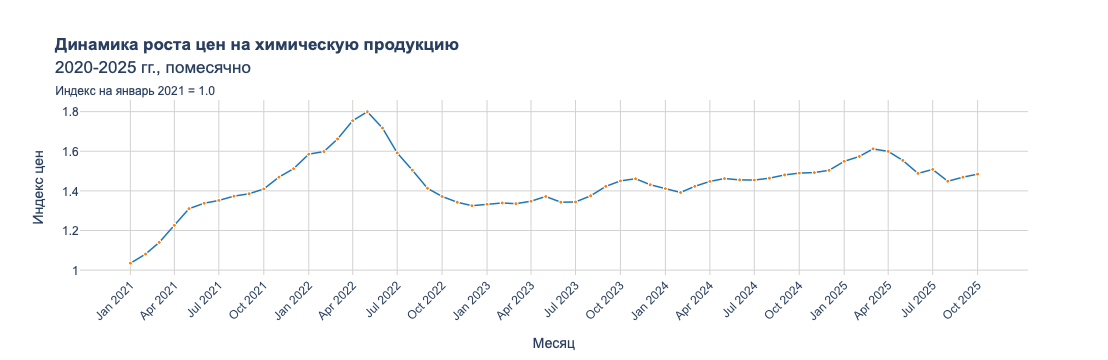

In [4]:
chemical_prices_growth_2020_2025_by_month_plot = px.line(
    x=monthly_price_growth_pd.index, 
    y=monthly_price_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., помесячно</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    #title='<b>Динамика роста цен на химическую продукцию</b><br><span style="font-size: 12px;">Индекс на декабрь 2020 = 1.0</span>'
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_month_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Месяц',
        #dtick='M3',  # показывать каждые 3 месяца для читаемости
        tickmode='array',  # явно задать деления
        tickvals=monthly_price_growth_pd.index[::3],  # каждые 3 месяца
        tickformat='%b %Y'  # формат "Янв 2021"
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_month_plot.update_traces(
    mode='lines+markers',
    marker=dict(
        size=4,                    # чуть меньше размер для месячных данных
        color='#ff7f0e',
        line=dict(width=1, color='white')
    ),
    line=dict(width=1.5),          # тоньше линия для большей детализации
    hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_month_plot.show()

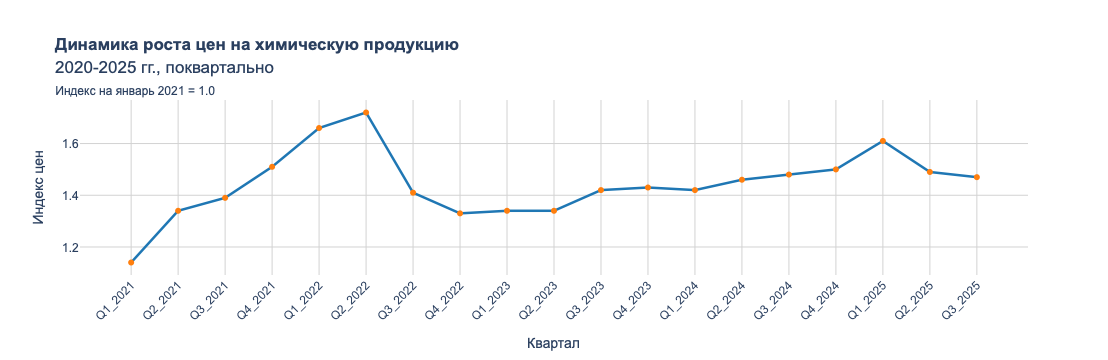

In [5]:
def create_quarterly_features(historical_prices):
    """
    Создает квартальные фичи на основе месячных данных
    Берет последний месяц каждого квартала
    """
    quarterly_features = {}
    
    # Отбираем конечные месяцы кварталов
    quarter_months = {
        'Q1': '03',  # март
        'Q2': '06',  # июнь
        'Q3': '09',  # сентябрь
        'Q4': '12'   # декабрь
    }
    
    for month, price in historical_prices.items():
        year, month_num = month.split('-')
        
        # Проверяем, является ли месяц конечным в квартале
        for quarter, end_month in quarter_months.items():
            if month_num == end_month:
                feature_name = f'Цена_{quarter}_{year}'
                quarterly_features[feature_name] = round(price, 2)
    
    return quarterly_features

quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()

chemical_prices_growth_2020_2025_by_quarter_plot = px.line(
    x=quarterly_prices_growth_pd.index, 
    y=quarterly_prices_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., поквартально</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Квартал'
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_traces(
    mode='lines+markers',
    marker=dict(size=6, color='#ff7f0e'),
    line=dict(width=2.5),
    hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_quarter_plot.show()

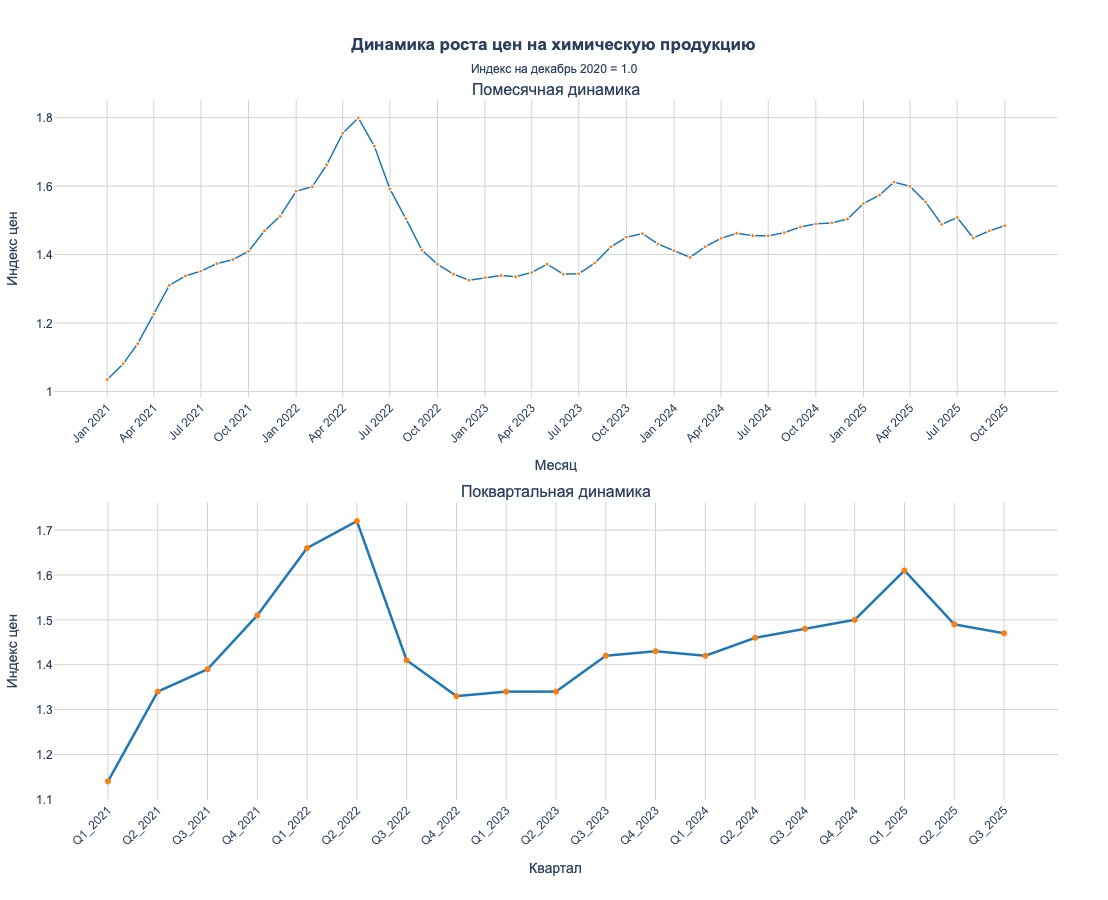

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Создаем subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Помесячная динамика', 'Поквартальная динамика'),
    vertical_spacing=0.15,
    shared_xaxes=False
)

# Добавляем месячный график
fig.add_trace(
    go.Scatter(
        x=monthly_price_growth_pd.index,
        y=monthly_price_growth_pd,
        mode='lines+markers',
        name='Месячный',
        line=dict(width=1.5, color='#1f77b4'),
        marker=dict(size=4, color='#ff7f0e', line=dict(width=1, color='white')),
        hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Добавляем квартальный график
fig.add_trace(
    go.Scatter(
        x=quarterly_prices_growth_pd.index,
        y=quarterly_prices_growth_pd,
        mode='lines+markers',
        name='Квартальный', 
        line=dict(width=2.5, color='#1f77b4'),
        marker=dict(size=6, color='#ff7f0e'),
        hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=2, col=1
)

# Настраиваем оси для месячного графика
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    tickmode='array',
    tickvals=monthly_price_growth_pd.index[::3],
    tickformat='%b %Y',
    title_text='Месяц',
    row=1, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='Индекс цен',
    row=1, col=1
)

# Настраиваем оси для квартального графика  
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    title_text='Квартал',
    row=2, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='Индекс цен',
    row=2, col=1
)

# ОДИН update_layout со всеми настройками
fig.update_layout(
    title_text='<b>Динамика роста цен на химическую продукцию</b><br><span style="font-size: 12px;">Индекс на декабрь 2020 = 1.0</span>',
    title_x=0.5,
    width=1200,
    height=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    showlegend=False,
    margin=dict(l=50, r=50, t=100, b=100)
)

fig.show()


# Сохраняем график в PNG

fig.write_image(
    FOLDER_PATH + 'graphs/Rosstat.png',
    format="png",
    width=1200,
    height=900, 
    scale=2)


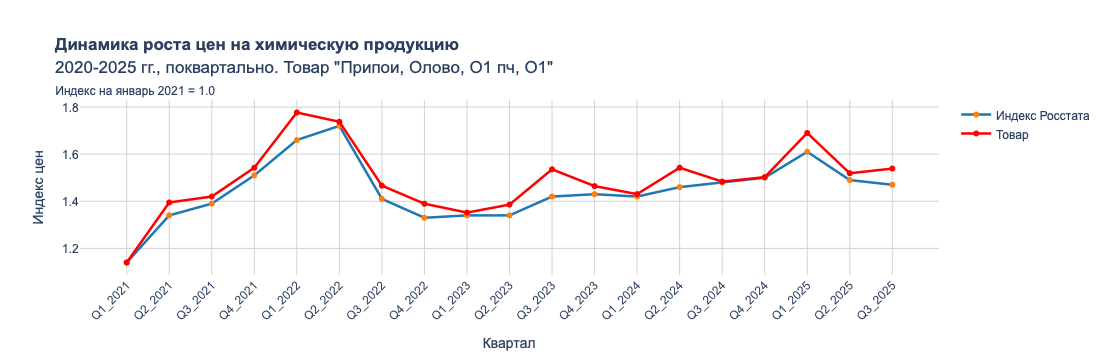

In [22]:
import plotly.graph_objects as go
data_sample = data.sample(1)
data_sample_price_history = data_sample[[
    'Цена_Q1_2021', 'Цена_Q2_2021', 'Цена_Q3_2021', 'Цена_Q4_2021',
    'Цена_Q1_2022', 'Цена_Q2_2022', 'Цена_Q3_2022', 'Цена_Q4_2022', 
    'Цена_Q1_2023', 'Цена_Q2_2023', 'Цена_Q3_2023', 'Цена_Q4_2023',
    'Цена_Q1_2024', 'Цена_Q2_2024', 'Цена_Q3_2024', 'Цена_Q4_2024',
    'Цена_Q1_2025', 'Цена_Q2_2025', 'Цена_Q3_2025']].squeeze()

data_sample_quarter_scalled = data_sample_price_history.pct_change() + 1
data_sample_quarter_scalled['Цена_Q1_2021'] = 1.14
data_sample_quarter_scalled = data_sample_quarter_scalled.cumprod()
data_sample_quarter_scalled.index = data_sample_quarter_scalled.index.str.slice(5)

def create_quarterly_features(historical_prices):
    """
    Создает квартальные фичи на основе месячных данных
    Берет последний месяц каждого квартала
    """
    quarterly_features = {}
    
    # Отбираем конечные месяцы кварталов
    quarter_months = {
        'Q1': '03',  # март
        'Q2': '06',  # июнь
        'Q3': '09',  # сентябрь
        'Q4': '12'   # декабрь
    }
    
    for month, price in historical_prices.items():
        year, month_num = month.split('-')
        
        # Проверяем, является ли месяц конечным в квартале
        for quarter, end_month in quarter_months.items():
            if month_num == end_month:
                feature_name = f'Цена_{quarter}_{year}'
                quarterly_features[feature_name] = round(price, 2)
    
    return quarterly_features

quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()

import plotly.graph_objects as go

# Создаем график через go.Figure с сохранением всех настроек
chemical_prices_growth_2020_2025_by_quarter_plot = go.Figure()

# Добавляем основной график (тот что был в px.line)
chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
    go.Scatter(
        x=quarterly_prices_growth_pd.index, 
        y=quarterly_prices_growth_pd,
        mode='lines+markers',
        name='Индекс Росстата',
        line=dict(width=2.5, color='#1f77b4'),
        marker=dict(size=6, color='#ff7f0e'),
        hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
    )
)

# Добавляем второй датасет
chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
    go.Scatter(
        x=data_sample_quarter_scalled.index,
        y=data_sample_quarter_scalled,
        mode='lines+markers',
        name='Товар',
        line=dict(width=2.5, color='red'),
        marker=dict(size=6, color='red'),
        hovertemplate='<b>%{x}</b><br>Значение: %{y:.2f}<extra></extra>'
    )
)

# Копируем все настройки layout из px.line
chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
    title=f'<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., поквартально. Товар \"{data_sample["Название товара"].item()}\"</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    xaxis_title='Период',
    yaxis_title='Индекс цен (база = 1)',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Квартал'
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=True
)

chemical_prices_growth_2020_2025_by_quarter_plot.show()

chemical_prices_growth_2020_2025_by_quarter_plot.write_image(
    FOLDER_PATH + f'graphs/product_{data_sample["Название товара"].item()}.png',
    format="png",
    width=1200,
    height=600, 
    scale=2)
